In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [4]:
df_actives = pd.read_csv('/content/drive/MyDrive/DNN/HER2/data/HER2-actives.smi', sep='\t', header=None)
df_actives.columns = ['SMILES', 'ID']
df_actives['class'] = 1
df_inactives = pd.read_csv('/content/drive/MyDrive/DNN/HER2/data/HER2-inactives.smi', sep='\t', header=None)
df_inactives.columns = ['SMILES', 'ID']
df_inactives['class'] = 0
df = pd.concat([df_actives, df_inactives], axis=0)
df.head()
df_class_target = df['class']

In [5]:
df_actives.shape

(1684, 3)

In [6]:
df_inactives.shape

(2258, 3)

In [7]:
df.shape

(3942, 3)

In [8]:
#df_inactives.head()

In [9]:
dictionary_data = dict(zip(df['ID'], df['SMILES']))

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

def generate_ecfp6_fingerprint(smiles):
    """
    Generate ECFP6 fingerprint as a bit vector for a molecule in SMILES format.

    Parameters:
    - smiles (str): SMILES representation of the molecule

    Returns:
    - fingerprint (list): List representing the bit vector of the ECFP6 fingerprint
    """
    mol = Chem.MolFromSmiles(smiles)

    if mol is not None:
        # Generate ECFP6 fingerprint
        ecfp6 = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)

        # Convert the bit vector to a list of integers
        fingerprint = [int(ecfp6.GetBit(i)) for i in range(ecfp6.GetNumBits())]

        return fingerprint
    else:
        return None

# Example string with comma-separated SMILES and SMILES IDs
smiles_and_ids = "CCO,smiles_1;CCN,smiles_2;CCOc1ccccc1,smiles_3"

# Split the input string into individual SMILES and SMILES IDs
smiles_data = [tuple(pair.split(',')) for pair in smiles_and_ids.split(';')]

# Generate fingerprints for each SMILES in the list
fingerprints_data = [(smiles_id, generate_ecfp6_fingerprint(smiles)) for smiles_id, smiles in list(dictionary_data.items())]

# Create a DataFrame with column names
column_names = [f'ecfp_{i+1}' for i in range(2048)]  # Adjust the number based on your fingerprint size
df_FP = pd.DataFrame([{"ID": smiles_id, **dict(zip(column_names, fingerprint))} for smiles_id, fingerprint in fingerprints_data])

# Display the DataFrame
print(df_FP.head())


              ID  ecfp_1  ecfp_2  ecfp_3  ecfp_4  ecfp_5  ecfp_6  ecfp_7  \
0  CHEMBL1923015       0       0       0       0       0       0       0   
1  CHEMBL3409483       0       0       0       0       0       0       0   
2   CHEMBL377250       0       0       0       0       0       0       0   
3   CHEMBL212954       0       0       0       0       0       0       0   
4   CHEMBL212965       0       0       0       0       0       0       0   

   ecfp_8  ecfp_9  ...  ecfp_2039  ecfp_2040  ecfp_2041  ecfp_2042  ecfp_2043  \
0       0       0  ...          0          0          0          0          0   
1       0       0  ...          0          0          0          0          0   
2       0       0  ...          0          0          0          0          0   
3       0       0  ...          0          0          0          0          0   
4       0       0  ...          0          0          0          0          1   

   ecfp_2044  ecfp_2045  ecfp_2046  ecfp_2047  ecfp_2048

In [12]:
# Merging smiles data with fingerprints
df_all = pd.merge(df, df_FP, on='ID')
df_all.head()

,SMILES,ID,class,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
0,[O-][S+](CCO)CCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(...,CHEMBL1923015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[O-][S+]1CCN(Cc2ccc(-c3cc4c(Nc5ccc(OCc6cccc(F)...,CHEMBL3409483,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL377250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212954,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212965,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Randomizing the dataset
df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all.head()

,SMILES,ID,class,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
0,CN(C)Cc1ccc(-c2cc3c(Nc4ccc(OCc5cccc(F)c5)c(Cl)...,CHEMBL475767,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C=C(CNc1cc2c(Nc3ccc(OCc4ccccc4)c(Cl)c3)c(C#N)c...,CHEMBL367754,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,COc1cc(CCCN2CCN(C)CC2)ccc1Nc1nccc(-c2c(-c3cccc...,CHEMBL3915736,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC(C)N(CC#CC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1...,CHEMBL92961,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C[C@]12CC[C@@H]3[C@H]4CCC(=O)C=C4CC[C@H]3[C@@H...,CHEMBL757,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = df_all.drop(['ID', 'SMILES', 'class'], axis=1)#.values
y = df_all['class']#.values

##Deep Learning Model building

In [15]:
# Function to create model, required for KerasClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, Nadam

def model_DNN_classifier(nh_layers=3, input_dim=1024, num_hidden=[1024, 1024, 1024],
                 num_labels=1, drop_out=0.1, beta=0.001, l_rate=0.01, momentum=0.9,
                 init_mode='he_normal', optimizer='SGD', activation='relu', activation_out='sigmoid',
                 model_summary=True):
    """
    N layers DNN model with drop out layers for each hidden layer. All the default parameters are for
    a 3 layer DNN model
    input:
    nh_layers: number of hidden layers
    input_dim: number of features in the dataset
    num_hidden: hidden layers size as a list
    num_labels: number of labels
    drop_out: the same drop out applied for all hidden layers
    beta: l2 regularization
    l_rate: initial learning rate
    momentum: used only for SGD optimizer
    init_mode: weight initiation method
    optimizer: optimizer name
    activation: hidden layers activation function
    activation_out: out layer activation function
    device: gpu:0 (can accept cpu:0 or gpu:1)
    odel_summary: show the model suumary, default is True)
    output:
    model: keras DNN model

    """
    if len(num_hidden) != nh_layers:
        return print("The number of layers nh_layers are not matched to the length of num_hidden")
    if activation == 'relu':
        act = 'relu'
    elif activation == 'tanh':
        act = 'tanh'
    elif activation == 'LeakyReLU':
        act = LeakyReLU()
    elif activation == 'SReLU':
        act = SReLU()
    else:
        return print("I can't use this activation function to compile a DNN")
    #with tf.device('/' + device):
#    with tf.device('/' + device):
        # create model
    model = Sequential(name='model_'+str(nh_layers)+'_layers')
    model.add(Dense(units=num_hidden[0], kernel_initializer=init_mode, input_dim=input_dim,
                        kernel_regularizer=l2(l=beta), name='Dense_1'))
    model.add(Activation(act))
    model.add(Dropout(drop_out, name='DropOut_1'))
    for idx in range(nh_layers - 1):
        model.add(Dense(units=num_hidden[idx+1], kernel_initializer=init_mode,
                            kernel_regularizer=l2(l=beta), name='Dense_'+str(idx+2)))
        if activation == 'LeakyReLU':
            act = LeakyReLU(input_shape=(num_hidden[idx+1],))
        elif activation == 'SReLU':
            act = SReLU(input_shape=(num_hidden[idx+1],))
        model.add(Activation(act))
        model.add(Dropout(drop_out, name='DropOut_'+str(idx+2)))
    model.add(Dense(units=num_labels, kernel_initializer=init_mode,
                        activation=activation_out, kernel_regularizer=l2(l=beta), name='Output'))
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=l_rate, momentum=momentum, nesterov=True)
    elif optimizer == 'Adam':
        opt = Adam(lr=l_rate)
    elif optimizer == 'Nadam':
        opt = Nadam(lr=l_rate)
    else:
        return print("I don't know the %s optimizer" % optimizer)
    if model_summary:
        model.summary()
    model.compile(loss='binary_crossentropy', metrics=['binary_crossentropy', f1_metric, 'accuracy'], optimizer=opt)
    return model

In [16]:
from keras.callbacks import Callback

class BatchLogger(Callback):
    def __init__(self, display):
        '''
        display: display progress every 5%
        '''
        self.seen = 0
        self.display = display

    def on_batch_end(self, batch, logs=None):
        self.params['nb_sample'] = X_train.shape[0]
        total_steps = self.params['nb_sample'] * (self.params['epochs'] - 1)
        self.seen += logs.get('size', 0)
        percent_check = total_steps * self.display / 100
        if self.seen % percent_check == 0:
            all_param = (100 * self.seen / total_steps, logs.get('loss'))
            print("%d%% Done  Loss: %0.4f" % all_param)


In [17]:
# Importing nesessary modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import sys
import random
from itertools import cycle
from IPython.display import SVG
from keras import backend as K
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, accuracy_score, make_scorer
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, precision_score, recall_score
from sklearn.metrics import r2_score, confusion_matrix, brier_score_loss, average_precision_score
%matplotlib inline

# font and othere plot settings
plt.style.use('seaborn-darkgrid')
sns.set_context("poster")
plt.rcParams['font.family'] = 'sans-serif'

<ipython-input-17-c5f30fac48b0>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [18]:
# plot loss from train history
def plot_train_history(model):
    """
    input: model training history from keras
    output: plot loss vs epochs
    """
    lw = 2
    plt.figure(figsize=(8, 6))
    plt.plot(model.epoch, model.history['loss'],c='b', label="Train loss", lw=lw)
    plt.ylim([0.0, max(model.history['loss'])])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# helper for ROC plotting and AUC saving for the model
def ROC_plot(model, model_name, X_train, y_train_class, X_test, y_test_class, batch_size=None, lw=2, DNN=False):
    """
    This function will plot ROC curves for a model
    input:
    model: tuned classification model
    X_train, y_train, X_test, y_test: pre-processed dataseries, dataframes, or nupy arrays sutable for this model
    DNN: flag for classic ML or DNN model, default is False
    Output:
    dictionary: ('train', 'AUC'): roc_auc_tr*100, ('train', 'ACC'): ACC_tr, ('train', 'f1-score'): f1_tr,
            ('train', 'Cohen_Kappa'): cohen_kappa_tr, ('train', 'Matthews_corr'): matthews_corr_tr,
             ('train', 'Precision'): precision_tr, ('train', 'Recall'): recall_tr,
            ('test', 'AUC'): roc_auc_ts*100, ('test', 'ACC'): ACC_ts, ('test', 'f1-score'): f1_ts,
            ('test', 'Cohen_Kappa'): cohen_kappa_ts, ('test', 'Matthews_corr') : matthews_corr_ts,
            ('test', 'Precision') : precision_ts, ('test', 'Recall'): recall_ts
    """
    if DNN:
        classes_tr = model.predict(X_train.values, batch_size=batch_size, verbose=0)
        classes_tr = K.round(classes_tr)
        classes_ts = model.predict(X_test.values, batch_size=y_test_class.shape[0], verbose=0)
        classes_ts = K.round(classes_ts)
        proba_tr = model.predict(X_train.values, batch_size=batch_size, verbose=0)
        proba_ts = model.predict(X_test.values, batch_size=y_test_class.shape[0], verbose=0)
        ##proba_tr = model.predict_proba(X_train.values, batch_size=batch_size, verbose=0)[:, 0]
        #proba_ts = model.predict_proba(X_test.values, batch_size=y_test_class.shape[0], verbose=0)[:, 0]
    else:
        classes_tr = model.predict(X_train.values)
        classes_ts = model.predict(X_test.values)
        proba_tr = model.predict_proba(X_train.values)[:, 1]
        proba_ts = model.predict_proba(X_test.values)[:, 1]

    ACC_tr = 100*accuracy_score(y_train_class, classes_tr)
    ACC_ts = 100*accuracy_score(y_test_class, classes_ts)
    accuracy = "train Accuracy = %.2f%%, test Accuracy = %.2f%%" % (ACC_tr, ACC_ts)

    f1_tr = 100*f1_score(y_train_class, classes_tr)
    f1_ts = 100*f1_score(y_test_class, classes_ts)
    f1_scores = "train f1-score = %.2f%%, test f1-score = %.2f%%" % (f1_tr, f1_ts)

    # train classification results
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train_class, proba_tr)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    # test classification results
    fpr_ts, tpr_ts, thresholds_ts = roc_curve(y_test_class, proba_ts)
    roc_auc_ts = auc(fpr_ts, tpr_ts)

    # Cohens Kappa
    cohen_kappa_tr = cohen_kappa_score(y_train_class, classes_tr)
    cohen_kappa_ts = cohen_kappa_score(y_test_class, classes_ts)
    cohen_kappa = "train Cohen Kappa = %.2f, test Cohen Kappa = %.2f" % (cohen_kappa_tr, cohen_kappa_ts)

    # Matthews correlation coefficient
    matthews_corr_tr = matthews_corrcoef(y_train_class, classes_tr)
    matthews_corr_ts = matthews_corrcoef(y_test_class, classes_ts)
    matthews_corr = "train Matthews correlation coefficient = %.2f, test Matthews correlation coefficient = %.2f" % (matthews_corr_tr, matthews_corr_ts)

    # Precision
    precision_tr = precision_score(y_train_class, classes_tr)
    precision_ts = precision_score(y_test_class, classes_ts)
    precision = "train Precision = %.2f, test Precision = %.2f" % (precision_tr, precision_ts)

    # Recall
    recall_tr = recall_score(y_train_class, classes_tr)
    recall_ts = recall_score(y_test_class, classes_ts)
    recall = "train Recall = %.2f, test Recall = %.2f" % (recall_tr, recall_ts)

    # print all metrics for test and test
    print('\nModelling results: \n%s \n%s \n%s \n%s \n%s \n%s \n' % (accuracy, f1_scores, cohen_kappa,
                                                                matthews_corr, precision, recall))

    # plot two ROC: train, test and train only
    fig = plt.figure(figsize=(13, 6))

    # Train and test ROC
    fig.add_subplot(1, 2, 1)
    # plot 50%
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')
    # plot train ROC
    plt.plot(fpr_tr, tpr_tr, lw=lw, color='r',
                 label='ROC %s (area = %0.2f%%)' % ('train', (roc_auc_tr*100)))
    # plot test ROC
    plt.plot(fpr_ts, tpr_ts, lw=lw+1, color='b',
                 label='ROC %s (area = %0.2f%%)' % ('test', (roc_auc_ts*100)))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for \n %s classifier \n' % model_name)
    plt.legend(loc="lower right")

    # Train ROC
    fig.add_subplot(1, 2, 2)
    # plot 50%
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')
    # plot train ROC
    plt.plot(fpr_tr, tpr_tr, lw=lw, color='r',
                 label='ROC (area = %0.2f%%)' % (roc_auc_tr*100))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for \n %s classifier \n' % model_name)
    plt.legend(loc="lower right")

    plt.show()

    return {('train', 'AUC'): roc_auc_tr*100, ('train', 'ACC'): ACC_tr, ('train', 'f1-score'): f1_tr,
            ('train', 'Cohen_Kappa'): cohen_kappa_tr, ('train', 'Matthews_corr'): matthews_corr_tr,
             ('train', 'Precision'): precision_tr, ('train', 'Recall'): recall_tr,
            ('test', 'AUC'): roc_auc_ts*100, ('test', 'ACC'): ACC_ts, ('test', 'f1-score'): f1_ts,
            ('test', 'Cohen_Kappa'): cohen_kappa_ts, ('test', 'Matthews_corr') : matthews_corr_ts,
            ('test', 'Precision') : precision_ts, ('test', 'Recall'): recall_ts}

def plot_heat_maps_cm(cm_tr, cm_ts):
    """
    plots confusion matrix heat map
    input:
    confusion matrix
    """
    fig = plt.figure(figsize=(13,4))
    fig.add_subplot(1, 2, 1)
    sns.heatmap(cm_tr, annot=True, annot_kws={'fontsize': 12},  fmt = 'd')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for %s dataset \n' % 'train')
#    sns.plt.title('Confusion matrix for %s dataset \n' % 'train')

    fig.add_subplot(1, 2, 2)
    sns.heatmap(cm_ts, annot=True, annot_kws={'fontsize': 12},  fmt = 'd')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#    sns.plt.title('Confusion matrix for %s dataset \n' % 'test')
    plt.title('Confusion matrix for %s dataset \n' % 'test')
    plt.show()
    return None


def plot_cm_final(model, model_name, X_tr, y_tr, X_ts, y_ts, batch_size=None, DNN=True):
    """
    plotting final confusion matrix
    """
    if DNN:
        y_pred_ts = model.predict(X_ts.values, batch_size=X_ts.shape[0], verbose=0)
        y_pred_ts = K.round(y_pred_ts)
        y_pred_tr = model.predict(X_tr.values, batch_size=batch_size, verbose=0)
        y_pred_tr = K.round(y_pred_tr)
    else:
        y_pred_tr = model.predict(X_train.values)
        y_pred_ts = model.predict(X_test.values)
    # confusion matixes
    cm_ts = confusion_matrix(y_ts, y_pred_ts)
    cm_tr = confusion_matrix(y_tr, y_pred_tr)
    print('\n'+model_name+'\n')
    plot_heat_maps_cm(cm_tr, cm_ts)
    return None



In [38]:
bins = df_all.shape[1]-3 # bins in fingerprints
n_split = 10 # # desirable stratified K-fold for cross-validation
max_layers = 3
test_set_size = 0.4 # approximate portion of dataset which will be used for test dataset
seed =0
major_subsample = 1 # for kcnq 0.2 works nice
drop_out=0.5 # drop out, probably we will use 0.5 to make sure no overfitting

In [20]:
bins

2048

##Train-Test split

In [22]:
# stratified split base on test dataset size (test_set_size) and K-fold split (n_split)
batch_size = int(y.shape[0]*(1-test_set_size) // n_split) # callculating batch size
train_size = int(batch_size * n_split)
X_train_tmp, X_test_tmp, y_train_class_tmp, y_test_class = train_test_split(X,
                                    y, train_size=train_size, stratify=y, random_state=seed)
print('train size = %d, batch size = %d, test size = %d' % (train_size, batch_size, y_test_class.shape[0]))

train size = 2360, batch size = 236, test size = 1582


In [23]:
# prepera dataset indexes for stratified K-fold split
cv = StratifiedKFold(shuffle=True, n_splits=n_split, random_state=0)
valid_idx = [] # indexes for new train dataset
for (_, valid) in cv.split(X_train_tmp, y_train_class_tmp):
    valid_idx += valid.tolist()

In [24]:
X_train = X_train_tmp.iloc[valid_idx].iloc[:,:bins]
print("Train features info:")
print(X_train.info())
X_train.describe()

Train features info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 424 to 1276
Columns: 2048 entries, ecfp_1 to ecfp_2048
dtypes: int64(2048)
memory usage: 36.9 MB
None


,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,ecfp_10,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,...,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000,2360.000000
mean,0.012288,0.141102,0.037712,0.055508,0.016949,0.023729,0.003814,0.010593,0.021186,0.027966,...,0.027966,0.017797,0.006780,0.022034,0.057203,0.026695,0.022034,0.010593,0.051695,0.011441
std,0.110192,0.348200,0.190539,0.229019,0.129108,0.152235,0.061649,0.102398,0.144036,0.164911,...,0.164911,0.132240,0.082076,0.146825,0.232280,0.161224,0.146825,0.102398,0.221457,0.106370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X_test = X_test_tmp.iloc[:,:bins]
print("Test features info:")
print(X_test.info())
X_test.describe()

Test features info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 310 to 1903
Columns: 2048 entries, ecfp_1 to ecfp_2048
dtypes: int64(2048)
memory usage: 24.7 MB
None


,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,ecfp_10,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.00000,...,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000
mean,0.008217,0.141593,0.045512,0.066372,0.014539,0.022756,0.004425,0.010114,0.020228,0.02086,...,0.025917,0.018331,0.004425,0.027813,0.051833,0.014539,0.020228,0.011378,0.045512,0.013274
std,0.090305,0.348742,0.208490,0.249009,0.119734,0.149172,0.066393,0.100089,0.140822,0.14296,...,0.158937,0.134189,0.066393,0.164488,0.221760,0.119734,0.140822,0.106093,0.208490,0.114483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
y_train_class = y_train_class_tmp.iloc[valid_idx]
print("Train class info:")
print(y_train_class.describe())

Train class info:
count    2360.000000
mean        0.427119
std         0.494765
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64


In [27]:
# dictionary to save all the model performance characteristics
DNN_performance = {} # we can use it later if needed

In [29]:
from sklearn.utils.class_weight import compute_class_weight
def cw_to_dict(y_class):
    """
    input: 1D array, labels
    output: balanced class weight dictionary
    """
    cw = compute_class_weight('balanced', classes=[0, 1], y=y_class) #compute class weight
    cw_dict = {}
    for idx in range(len(cw)):
        cw_dict[idx] = cw[idx]
    return cw_dict

In [30]:
# dictionary of weights
cw_tr_dict = cw_to_dict(y_train_class)
cw_ts_dict = cw_to_dict(y_test_class)
print("Train class weights: \n", cw_tr_dict)
print("Test class weights: \n", cw_ts_dict)

Train class weights: 
 {0: 0.8727810650887574, 1: 1.1706349206349207}
Test class weights: 
 {0: 0.8730684326710817, 1: 1.1701183431952662}


In [31]:
# lists of weights for each sample
cw_tr = [cw_tr_dict[idx] for idx in y_train_class]
cw_ts = [cw_ts_dict[idx] for idx in y_test_class]

In [32]:
# callbacks and evaluation metrices
from keras.callbacks import ReduceLROnPlateau, Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import BinaryCrossentropy, Accuracy, Precision, Recall
from keras.metrics import binary_crossentropy, binary_accuracy
from sklearn.metrics import f1_score
import time
import tensorflow as tf
from keras import backend as K

def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)  # Round predictions to nearest integer (0 or 1)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)

# Training the model

Streaming output truncated to the last 5000 lines.
0% Done  Loss: 0.0738
0% Done  Loss: 0.0765
0% Done  Loss: 0.0769
0% Done  Loss: 0.0761
0% Done  Loss: 0.0759
0% Done  Loss: 0.0762
0% Done  Loss: 0.0780
0% Done  Loss: 0.0781
0% Done  Loss: 0.0777
0% Done  Loss: 0.0783
0% Done  Loss: 0.0718
0% Done  Loss: 0.0757
0% Done  Loss: 0.0768
0% Done  Loss: 0.0761
0% Done  Loss: 0.0762
0% Done  Loss: 0.0760
0% Done  Loss: 0.0776
0% Done  Loss: 0.0775
0% Done  Loss: 0.0780
0% Done  Loss: 0.0780
0% Done  Loss: 0.0755
0% Done  Loss: 0.0737
0% Done  Loss: 0.0754
0% Done  Loss: 0.0774
0% Done  Loss: 0.0797
0% Done  Loss: 0.0791
0% Done  Loss: 0.0791
0% Done  Loss: 0.0787
0% Done  Loss: 0.0790
0% Done  Loss: 0.0785
0% Done  Loss: 0.0805
0% Done  Loss: 0.0794
0% Done  Loss: 0.0781
0% Done  Loss: 0.0782
0% Done  Loss: 0.0773
0% Done  Loss: 0.0768
0% Done  Loss: 0.0784
0% Done  Loss: 0.0780
0% Done  Loss: 0.0787
0% Done  Loss: 0.0784
0% Done  Loss: 0.0855
0% Done  Loss: 0.0821
0% Done  Loss: 0.0793
0% 

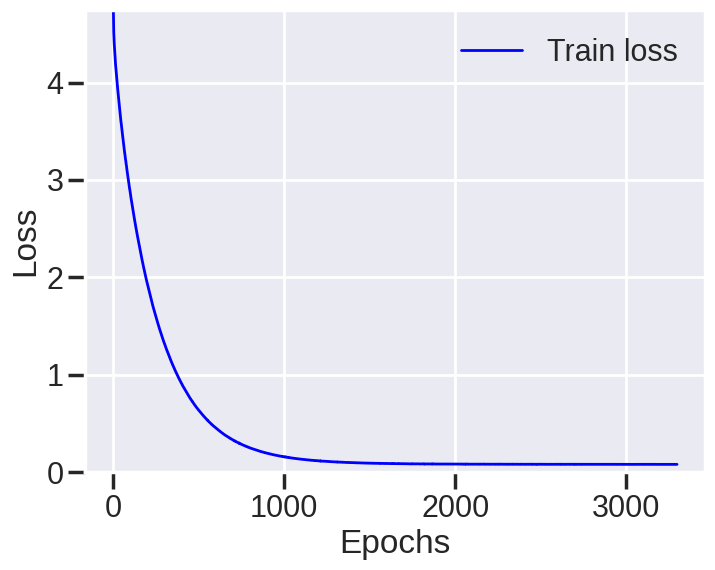


Modelling results: 
train Accuracy = 99.83%, test Accuracy = 89.13% 
train f1-score = 99.80%, test f1-score = 87.68% 
train Cohen Kappa = 1.00, test Cohen Kappa = 0.78 
train Matthews correlation coefficient = 1.00, test Matthews correlation coefficient = 0.78 
train Precision = 1.00, test Precision = 0.85 
train Recall = 1.00, test Recall = 0.91 



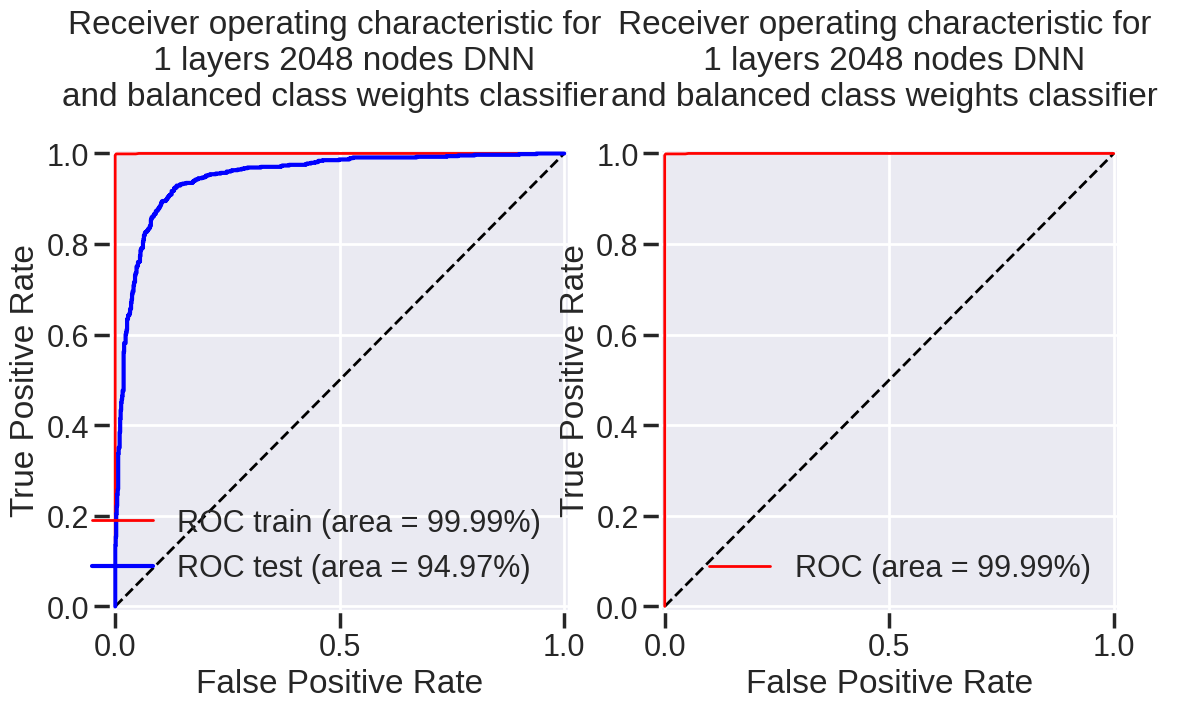


1 layers 2048 nodes DNN



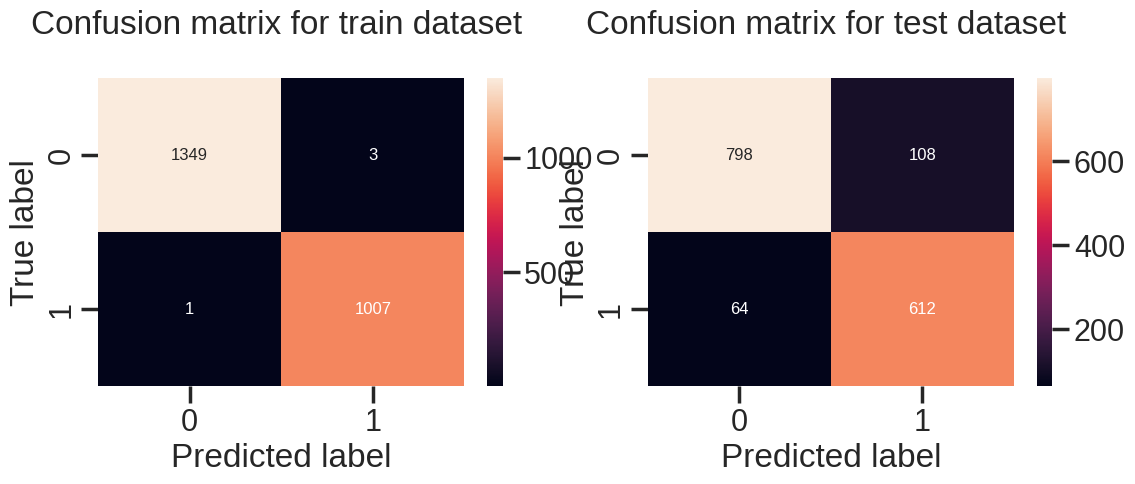

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
0% Done  Loss: 0.0459
0% Done  Loss: 0.0450
0% Done  Loss: 0.0446
0% Done  Loss: 0.0439
0% Done  Loss: 0.0468
0% Done  Loss: 0.0470
0% Done  Loss: 0.0468
0% Done  Loss: 0.0470
0% Done  Loss: 0.0468
0% Done  Loss: 0.0467
0% Done  Loss: 0.0436
0% Done  Loss: 0.0456
0% Done  Loss: 0.0452
0% Done  Loss: 0.0452
0% Done  Loss: 0.0468
0% Done  Loss: 0.0463
0% Done  Loss: 0.0463
0% Done  Loss: 0.0460
0% Done  Loss: 0.0474
0% Done  Loss: 0.0470
0% Done  Loss: 0.0449
0% Done  Loss: 0.0466
0% Done  Loss: 0.0508
0% Done  Loss: 0.0488
0% Done  Loss: 0.0502
0% Done  Loss: 0.0494
0% Done  Loss: 0.0486
0% Done  Loss: 0.0482
0% Done  Loss: 0.0480
0% Done  Loss: 0.0476
0% Done  Loss: 0.0535
0% Done  Loss: 0.0500
0% Done  Loss: 0.0485
0% Done  Loss: 0.0485
0% Done  Loss: 0.0482
0% Done  Loss: 0.0472
0% Done  Loss: 0.0469
0% Done  Loss: 0.0471
0% Done  Loss: 0.0468
0% Done  Loss: 0.0465
0% Done  Loss: 0.0538
0% Done  Loss: 0.0496
0% Done  Loss: 0.0481
0% 

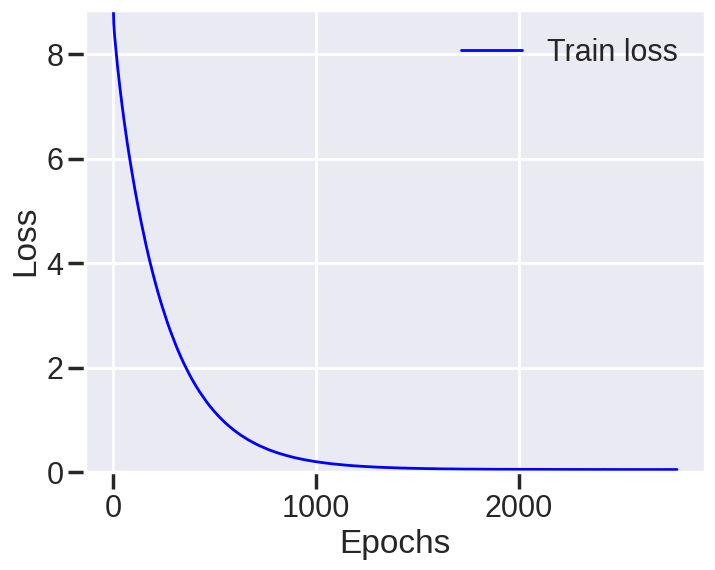


Modelling results: 
train Accuracy = 99.83%, test Accuracy = 89.00% 
train f1-score = 99.80%, test f1-score = 87.46% 
train Cohen Kappa = 1.00, test Cohen Kappa = 0.78 
train Matthews correlation coefficient = 1.00, test Matthews correlation coefficient = 0.78 
train Precision = 1.00, test Precision = 0.85 
train Recall = 1.00, test Recall = 0.90 



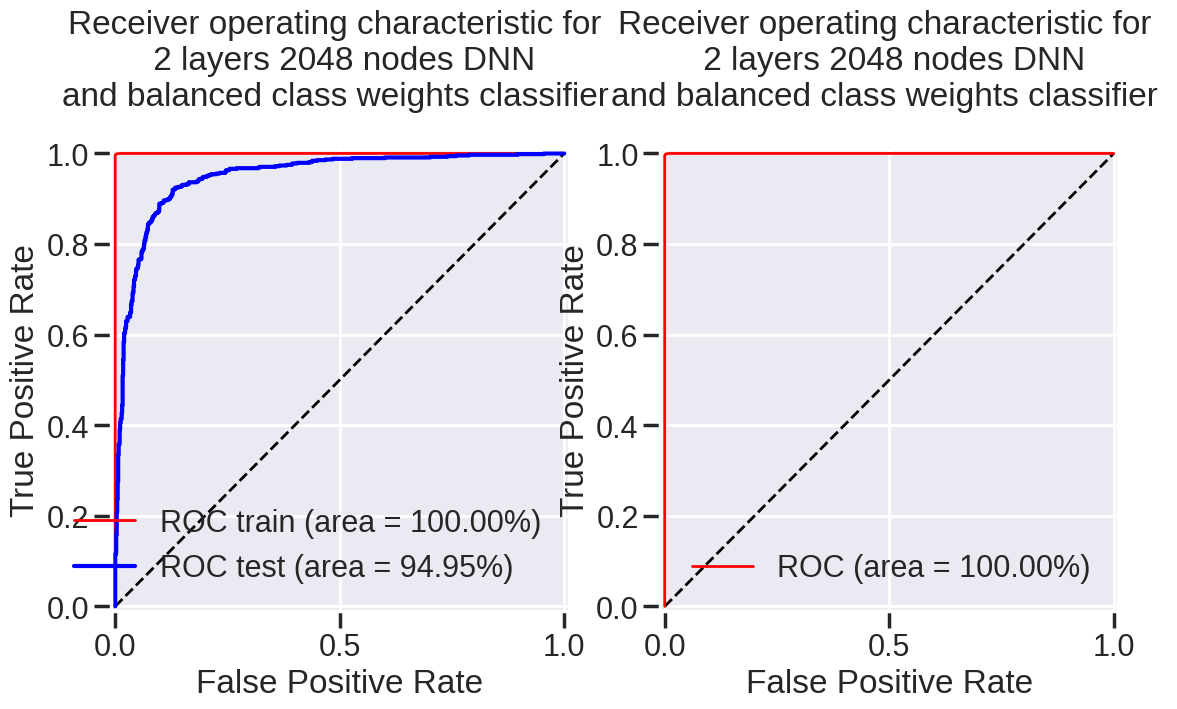


2 layers 2048 nodes DNN



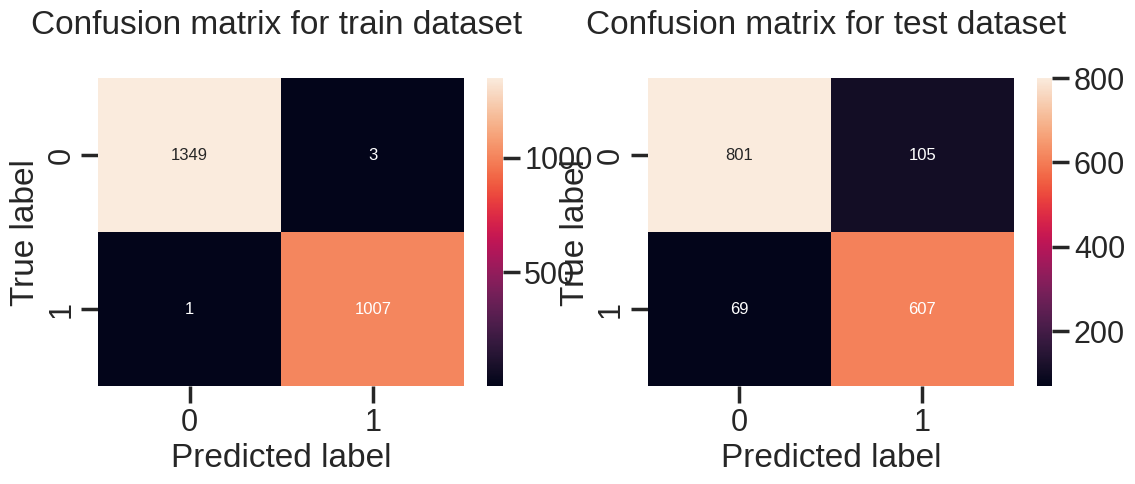

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
0% Done  Loss: 0.0329
0% Done  Loss: 0.0420
0% Done  Loss: 0.0388
0% Done  Loss: 0.0375
0% Done  Loss: 0.0364
0% Done  Loss: 0.0357
0% Done  Loss: 0.0353
0% Done  Loss: 0.0358
0% Done  Loss: 0.0357
0% Done  Loss: 0.0354
0% Done  Loss: 0.0394
0% Done  Loss: 0.0362
0% Done  Loss: 0.0358
0% Done  Loss: 0.0394
0% Done  Loss: 0.0381
0% Done  Loss: 0.0373
0% Done  Loss: 0.0364
0% Done  Loss: 0.0362
0% Done  Loss: 0.0358
0% Done  Loss: 0.0355
0% Done  Loss: 0.0413
0% Done  Loss: 0.0420
0% Done  Loss: 0.0388
0% Done  Loss: 0.0371
0% Done  Loss: 0.0359
0% Done  Loss: 0.0354
0% Done  Loss: 0.0354
0% Done  Loss: 0.0356
0% Done  Loss: 0.0353
0% Done  Loss: 0.0354
0% Done  Loss: 0.0319
0% Done  Loss: 0.0332
0% Done  Loss: 0.0330
0% Done  Loss: 0.0326
0% Done  Loss: 0.0337
0% Done  Loss: 0.0344
0% Done  Loss: 0.0342
0% Done  Loss: 0.0345
0% Done  Loss: 0.0371
0% Done  Loss: 0.0366
0% Done  Loss: 0.0323
0% Done  Loss: 0.0355
0% Done  Loss: 0.0363
0% 

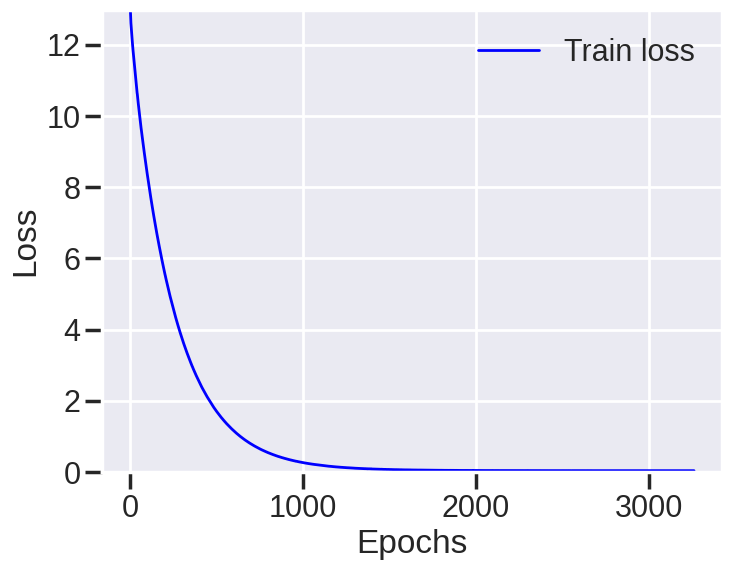


Modelling results: 
train Accuracy = 99.83%, test Accuracy = 88.69% 
train f1-score = 99.80%, test f1-score = 87.11% 
train Cohen Kappa = 1.00, test Cohen Kappa = 0.77 
train Matthews correlation coefficient = 1.00, test Matthews correlation coefficient = 0.77 
train Precision = 1.00, test Precision = 0.85 
train Recall = 1.00, test Recall = 0.89 



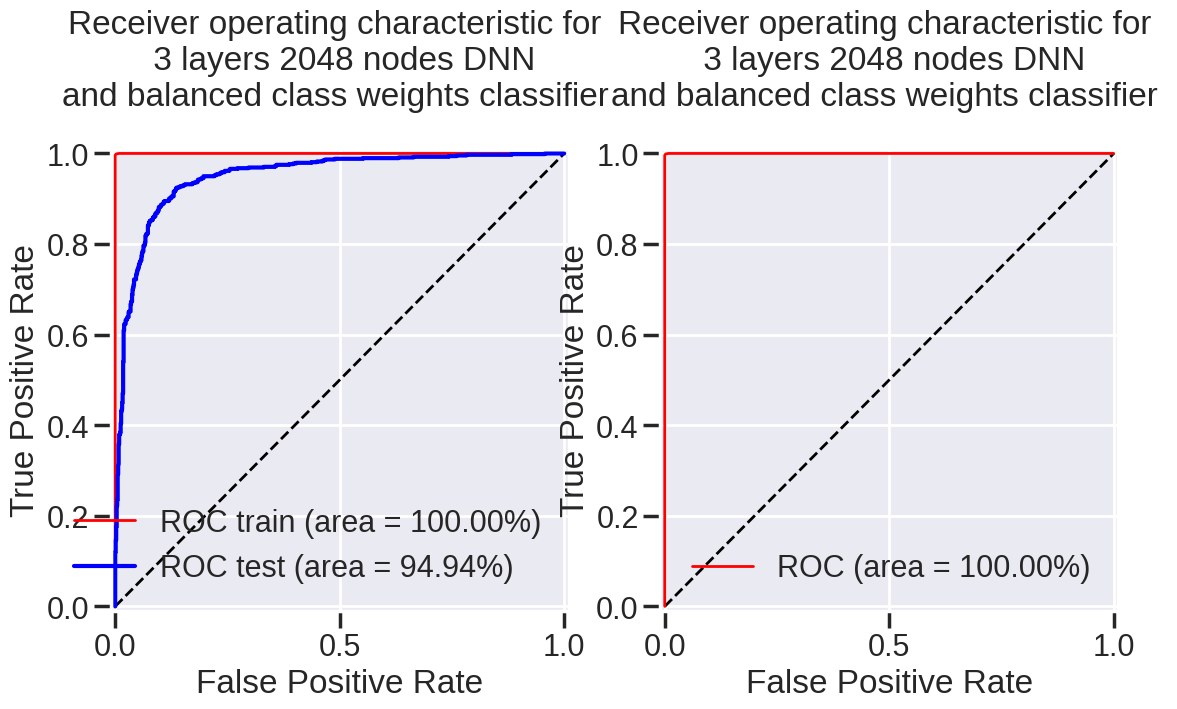


3 layers 2048 nodes DNN



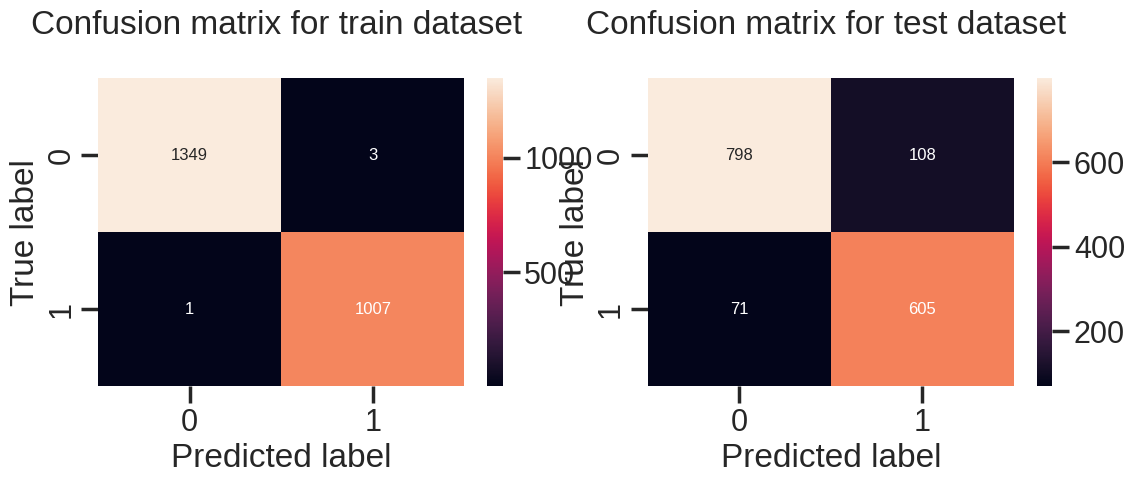


 


DONE


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
for n_layer in range(1, max_layers+1):
    print("\nTraining model with %d hidden layers, and %d nodes per layer \n" % (n_layer, bins))
    num_hidden = [bins for _ in range(n_layer)]
    #if n_layer % 2 == 0:
    #    gpu = 'gpu:0'
    #else:
    #    gpu = 'gpu:1'
    #print("Training on %s" % gpu)
    # maximum training steps
    num_steps = 10001
    # preparing model for training
    model_DNN_clf = model_DNN_classifier(nh_layers=n_layer, input_dim=bins, drop_out=drop_out,
                                         num_hidden=num_hidden) # constracting model
    # train this model to compare the new function
    start_clf = time.time()
    # verbose progeress every 5%
    out_batch = BatchLogger(display=5)
    # reduce learning rate if no change in loss for 25 steps
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.9, patience=50, min_lr=0.00001, verbose=1)
    # stop training in no improving in loss for 100 steps
    stopping = EarlyStopping(monitor='loss', min_delta=0.0, patience=200, verbose=1, mode='auto')
    # fit modle
    model_DNN_clf_h = model_DNN_clf.fit(X_train.values, y_train_class, epochs=num_steps,
                            batch_size=batch_size, class_weight = cw_tr_dict,
                            #validation_data = (X_test.values, y_test_class, np.array(cw_ts)), # test can be used for validation
                            callbacks=[reduce_lr, stopping, out_batch], verbose=0) # training data entire train dataset
    # show training time
    tr_time_clf = (time.time() - start_clf)/60
    print('Training time is %.2f min' % tr_time_clf)
    # plot train loss history
    plot_train_history(model_DNN_clf_h)
    # plot ROC curves
    model_DNN_name = str(n_layer)+' layers '+str(bins)+' nodes DNN'
    DNN_performance[model_DNN_name.replace(' ', '')] = ROC_plot(model_DNN_clf, model_DNN_name+'\nand balanced class weights',
                                                            X_train, y_train_class, X_test, y_test_class, batch_size, DNN=True)
    # show confusion train and test matrixes
    plot_cm_final(model_DNN_clf, model_DNN_name, X_train, y_train_class, X_test, y_test_class, batch_size)
    print("\n=========================================== \n \n")

    # saving Keras model
    model_DNN_clf.save('DNN_class_model_'+'_'+str(n_layer)+'layers_DNN_model.h5')  # creates a HDF5 file of the DNN model
    #del model_DNN_clf  # deletes the existing model

print("\nDONE")

In [42]:
# save results into a data frame
df_performance = pd.DataFrame.from_dict(DNN_performance)
df_performance.to_csv('DNN_performance.csv')  # save results
df_performance

1layers2048nodesDNN  2layers2048nodesDNN  \
train AUC                      99.994790            99.999046   
      ACC                      99.830508            99.830508   
      f1-score                 99.801784            99.801784   
      Cohen_Kappa               0.996537             0.996537   
      Matthews_corr             0.996539             0.996539   
      Precision                 0.997030             0.997030   
      Recall                    0.999008             0.999008   
test  AUC                      94.966006            94.953923   
      ACC                      89.127686            89.001264   
      f1-score                 87.679083            87.463977   
      Cohen_Kappa               0.779679             0.776784   
      Matthews_corr             0.780920             0.777614   
      Precision                 0.850000             0.852528   
      Recall                    0.905325             0.897929   

                     3layers2048nodesDNN  
train AUC                      99.999119  
      ACC                      99.830508  
      f1-score                 99.801784  
      Cohen_Kappa               0.996537  
      Matthews_corr             0.996539  
      Precision                 0.997030  
      Recall                    0.999008  
test  AUC                      94.935065  
      ACC                      88.685209  
      f1-score                 87.113031  
      Cohen_Kappa               0.770413  
      Matthews_corr             0.771282  
      Precision                 0.848527  
      Recall                    0.894970